# Interfaces con otros lenguajes
## Ejemplo 1: Problema a resolver

Supongamos que queremos resolver el problema de la rotación de vectores en el espacio usando los tres ángulos de Euler.



In [1]:
import numpy as np

In [2]:
pwd

'/home/fiol/trabajo/clases/pythons/clases-python/clases'

In [3]:
cd scripts/interfacing/

/home/fiol/trabajo/clases/pythons/clases-python/clases/scripts/interfacing


Si ya tenemos un módulo donde están programadas las funciones necesarias 

In [4]:
# %load rotacion_p.py
#! /usr/bin/ipython3
import numpy as np


def matrix_rotation(angles):
  cx, cy, cz = np.cos(angles)
  sx, sy, sz = np.sin(angles)
  R = np.zeros((3, 3))
  R[0, 0] = cx * cz - sx * cy * sz
  R[0, 1] = cx * sz + sx * cy * cz
  R[0, 2] = sx * sy

  R[1, 0] = -sx * cz - cx * cy * sz
  R[1, 1] = -sx * sz + cx * cy * cz
  R[1, 2] = cx * sy

  R[2, 0] = sy * sz
  R[2, 1] = -sy * cz
  R[2, 2] = cy
  return R


def rotate(angles, v):
  return np.dot(matrix_rotation(angles), v)


es fácil utilizarlas. Las importamos y utilizamos

In [5]:
import rotacion_p as rotp
N = 100
# Ángulos de Euler
angle = np.random.random(3)
# Definimos N vectores tridimensionales
v = np.random.random((3, N))

In [6]:
y= rotp.rotate(angle, v)

In [7]:
print(y[:,0:5].T)

[[ 0.7840167   0.43613278  0.57098052]
 [ 0.8407918  -0.35836933  0.49813484]
 [ 0.73091589 -0.28094334  0.98492941]
 [ 0.78210626  0.07733519  0.56587427]
 [ 0.40525978  0.18290591  0.76292864]]


## Interfaces con Fortran

Veamos cómo trabajar si tenemos el código para realizar las rotaciones en Fortran

### Primer ejemplo: Nuestro código

El código en Fortran que tenemos es:

```fortran
function rotate(theta, v, N) result(y)
  implicit none
  integer :: N
  real(8), dimension(3), intent(IN) :: theta
  real(8), dimension(3,N), intent(IN) :: v
  real(8), dimension(3,N) :: y
  real(8), dimension(3,3) :: R
  real(8) :: cx, cy, cz, sx, sy, sz

  ! Senos y Cosenos de los tres ángulos de Euler 
  cx = cos(theta(1)); cy = cos(theta(2)); cz = cos(theta(3))
  sx = sin(theta(1)); sy = sin(theta(2)); sz = sin(theta(3))

  ! Matriz de rotación
  R(1,1) = cx*cz - sx*cy*sz
  R(1,2) = cx*sz + sx*cy*cz
  R(1,3) = sx*sy

  R(2,1) = -sx*cz - cx*cy*sz
  R(2,2) = -sx*sz + cx*cy*cz
  R(2,3) = cx*sy

  R(3,1) = sy*sz
  R(3,2) = -sy*cz
  R(3,3) = cy

  ! Aplicamos la rotación
  y = matmul(R, v)
end function rotate
```

In [8]:
!cat rotacion.f90

module rotaciones

contains
  !> matrix_rotation
  !! Crea la matriz de rotación correspondiente a los tres ángulos de Euler
  !! 
  !! @param angles 
  !! @return R
  function matrix_rotation(angles) result(R)
    implicit none
    real(8), dimension(3), intent(IN) :: angles
    real(8), dimension(3,3) :: R
    real(8) :: cx, cy, cz, sx, sy, sz

    cx = cos(angles(1)); cy = cos(angles(2)); cz = cos(angles(3))
    sx = sin(angles(1)); sy = sin(angles(2)); sz = sin(angles(3))

    R(1,1) = cx*cz - sx*cy*sz
    R(1,2) = cx*sz + sx*cy*cz
    R(1,3) = sx*sy

    R(2,1) = -sx*cz - cx*cy*sz
    R(2,2) = -sx*sz + cx*cy*cz
    R(2,3) = cx*sy

    R(3,1) = sy*sz
    R(3,2) = -sy*cz
    R(3,3) = cy
  end function matrix_rotation

  !> rotate
  !!
  !! @param angles 
  !! @param v 
  !! @param N longitud del vector v 
  !! @return y
  function rotate(angles, v, N) result(y)
    implicit none
    integer, intent(IN) :: N
    real(8), dimension(3), intent(IN) :: angles
    real(8), dimension(3,N),

### F2PY
Este es código bastante limpio, y podemos utilizarlo en Python en forma bastante directa. F2PY  -Fortran to Python interface generator- es una utilidad que permite generar una interface para utilizar funciones y datos definidos en Fortran desde Python.

Información sobre la interfaz entre Fotran y Python, y en particular sobre F2PY, puede encontrarse en:

- [Scipy cookbook](http://scipy-cookbook.readthedocs.io/items/idx_interfacing_with_other_languages.html)
- [F2PY Users Guide and Reference Manual](https://docs.scipy.org/doc/numpy-dev/f2py/index.html)
- [Fortran Best Practices](http://www.fortran90.org/src/best-practices.html#interfacing-with-python)
- http://websrv.cs.umt.edu/isis/index.php/F2py_example

El primer paso es utilizar esta utilidad:
```bash
$ f2py3 -c rotacion.f90 -m rotacion_f
```

In [9]:
!f2py3 -c rotacion.f90 -m rotacion_f

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "rotacion_f" sources
f2py options: []
f2py:> /tmp/tmpx814nmy_/src.linux-x86_64-3.6/rotacion_fmodule.c
creating /tmp/tmpx814nmy_/src.linux-x86_64-3.6
Reading fortran codes...
	Reading file 'rotacion.f90' (format:free)
Post-processing...
	Block: rotacion_f
			Block: rotaciones
				Block: matrix_rotation
appenddecl: "dimension" not implemented.
				Block: rotate
appenddecl: "dimension" not implemented.
			Block: test_rotation
Post-processing (stage 2)...
	Block: rotacion_f
		Block: unknown_interface
			Block: rotaciones
				Block: matrix_rotation
				Block: rotate
			Block: test_rotation
Building modules...
	Building module "rotacion_f"...
		Constructing F90 module support for "rotaciones"...
		Creating wrapper for Fortran func

In [10]:
from rotacion_f import rotaciones as rotf

In [11]:
yf = rotf.rotate(angle, v)

In [12]:
np.allclose(yf,y)

True

Veamos qué es exactamente lo que importamos:

In [13]:
np.info(rotf.rotate)

y = rotate(angles,v,[n])

Wrapper for ``rotate``.

Parameters
----------
angles : input rank-1 array('d') with bounds (3)
v : input rank-2 array('d') with bounds (3,n)

Other Parameters
----------------
n : input int, optional
    Default: shape(v,1)

Returns
-------
y : rank-2 array('d') with bounds (3,n) and rotate storage


Como vemos, estamos usando la función `rotate` definida en Fortran. Notar que:
* Tiene tres argumentos.
   * Dos argumentos requeridos: `angles` y `v`
   * Un argumento, correspondiente a la dimensión `n` que F2PY automáticamente detecta como opcional.

             

### Segundo Ejemplo: Código heredado

La conversión que realizamos con f2py3 la podríamos haber realizado en dos pasos:

```bash
$ f2py3 rotacion.f90 -m rotacion_f -h rotacion.pyf
$ f2py3 -c rotacion.pyf -m rotacion_f
```
En el primer paso se crea un archivo *signature* que después se utiliza para crear el módulo que llamaremos desde **Python**. Haciéndolo en dos pasos nos permite modificar el texto del archivo *.pyf* antes de ejecutar el segundo comando.

Esto es útil cuando el código original no es lo suficientemente "moderno" o no tiene toda la información necesaria sobre los argumentos. Veamos que forma tienen con un ejemplo más simple (tomado de la [guía de usuario](https://docs.scipy.org/doc/numpy-dev/f2py/getting-started.html)):

```fortran
      SUBROUTINE FIB(A,N)
C
C     CALCULATE FIRST N FIBONACCI NUMBERS
C
      INTEGER N
      REAL*8 A(N)
      DO I=1,N
         IF (I.EQ.1) THEN
            A(I) = 0.0D0
         ELSEIF (I.EQ.2) THEN
            A(I) = 1.0D0
         ELSE 
            A(I) = A(I-1) + A(I-2)
         ENDIF
      ENDDO
      END
```

In [14]:
!f2py3 --overwrite-signature fib1.f -m fib1 -h fib1.pyf

Reading fortran codes...
	Reading file 'fib1.f' (format:fix,strict)
Post-processing...
	Block: fib1
			Block: fib
Post-processing (stage 2)...
Saving signatures to file "./fib1.pyf"


El contenido del archivo `fib1.pyf` es:

```f90

python module fib1 ! in 
    interface  ! in :fib1
        subroutine fib(a,n) ! in :fib1:fib1.f
            real*8 dimension(n) :: a
            integer, optional,check(len(a)>=n),depend(a) :: n=len(a)
        end subroutine fib
    end interface 
end python module fib1
```

Este código indica que tenemos una subrutina que toma dos argumentos:
- `a` es un array
- `n` es un entero opcional, que tiene que ser mayor que `len(a)`

In [15]:
!f2py3  -c fib1.pyf fib1.f > /dev/null

In [16]:
import fib1

In [17]:
print(fib1.fib.__doc__)

fib(a,[n])

Wrapper for ``fib``.

Parameters
----------
a : input rank-1 array('d') with bounds (n)

Other Parameters
----------------
n : input int, optional
    Default: len(a)



In [18]:
a = np.zeros(12)
fib1.fib(a)
print(a)

[  0.   1.   1.   2.   3.   5.   8.  13.  21.  34.  55.  89.]


In [19]:
a = np.zeros(12)
fib1.fib(a,8)
print(a)

[  0.   1.   1.   2.   3.   5.   8.  13.   0.   0.   0.   0.]


In [20]:
a = np.zeros(12)
fib1.fib(a,18)
print(a)

error: (len(a)>=n) failed for 1st keyword n: fib:n=18

Esta es una de las características de F2PY: hace un chequeo básico de los argumentos. Hay otro error que no llega a atrapar: Si le pasamos un array que no es del tipo indicado, falla (sin avisar). Éste claramente no es el comportamiento deseado:

In [21]:
a = np.zeros(12, dtype=int)
fib1.fib(a)
print(a)

[0 0 0 0 0 0 0 0 0 0 0 0]


Vamos a modificar el archivo de *signature* para enseñarle dos cosas:

- El entero es un argumento de entrada (requerido)
- El *array* `a` es un archivo de salida **exclusivamente**. Entonces no debemos dárselo. La parte `dimension(n)` y `depend(n)` indica que debe crear un vector de ese tamaño.


In [22]:
!cat fib1.pyf 

!    -*- f90 -*-
! Note: the context of this file is case sensitive.

python module fib1 ! in 
    interface  ! in :fib1
        subroutine fib(a,n) ! in :fib1:fib1.f
            real*8 dimension(n) :: a
            integer, optional,check(len(a)>=n),depend(a) :: n=len(a)
        end subroutine fib
    end interface 
end python module fib1

! This file was auto-generated with f2py (version:2).
! See http://cens.ioc.ee/projects/f2py2e/


In [23]:
!cat fib2.pyf

!    -*- f90 -*-
python module fib2 
  interface
    subroutine fib(a,n)
      real*8 dimension(n),intent(out),depend(n) :: a
      integer intent(in) :: n
    end subroutine fib
  end interface 
end python module fib2


In [24]:
!f2py3  -c fib2.pyf fib1.f > /dev/null

In [25]:
import fib2
print(fib2.fib.__doc__)

a = fib(n)

Wrapper for ``fib``.

Parameters
----------
n : input int

Returns
-------
a : rank-1 array('d') with bounds (n)



In [26]:
fib2.fib(9)

array([  0.,   1.,   1.,   2.,   3.,   5.,   8.,  13.,  21.])

In [27]:
print(fib2.fib(14))

[   0.    1.    1.    2.    3.    5.    8.   13.   21.   34.   55.   89.
  144.  233.]


La segunda manera de arreglar este problema, en lugar de modificar el archivo de *signature* podría haber sido modificar el código (o hacer una rutina intermedia). Agregando comentarios de la forma `Cf2py` no influimos en la compilación `Fortran` pero F2PY los reconoce. En este caso le damos la información sobre la intención de los argumentos en el código:

```fortran
      SUBROUTINE FIB(A,N)
C
C     CALCULATE FIRST N FIBONACCI NUMBERS
C
      INTEGER N
      REAL*8 A(N)
Cf2py intent(in) n
Cf2py intent(out) a
Cf2py depend(n) a
      DO I=1,N
         IF (I.EQ.1) THEN
            A(I) = 0.0D0
         ELSEIF (I.EQ.2) THEN
            A(I) = 1.0D0
         ELSE 
            A(I) = A(I-1) + A(I-2)
         ENDIF
      ENDDO
      END
```

In [28]:
!f2py3  -c fib3.f -m fib3 > /dev/null

In [29]:
import fib3
print(fib3.fib.__doc__)

a = fib(n)

Wrapper for ``fib``.

Parameters
----------
n : input int

Returns
-------
a : rank-1 array('d') with bounds (n)



In [30]:
print(fib2.fib.__doc__)

a = fib(n)

Wrapper for ``fib``.

Parameters
----------
n : input int

Returns
-------
a : rank-1 array('d') with bounds (n)



como vemos, son exactamente iguales.

### F2PY para código en C

Es posible usar F2PY para código escrito en C, pero en ese caso debemos escribir el *signature file* a mano.

Para código en C es conveniente utilizar **Cython**. Cython es un lenguaje de programación pensado para hacer más fácil escribir extensiones a Python en C. Uno escribe el código en Cython, y luego es traducido a C, con optimizaciones.

**Cython** también puede utilizarse con Fortran de una manera similar a cómo se usa con C. Para más información ver la [documentación oficial](http://docs.cython.org/en/latest/index.html)


# Animaciones con **Matploblib**

**Matplotlib** tiene funciones para hacer animaciones de una manera conveniente. 
Hay excelente información sobre el tema en:

- [La documentación (con ejemplos)](http://matplotlib.org/api/animation_api.html)
- [Tutorial en Pythonic Perambulations](http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

Vamos a ver brevemente cómo hacer animaciones

In [31]:
cd ../animaciones

/home/fiol/trabajo/clases/pythons/clases-python/clases/scripts/animaciones


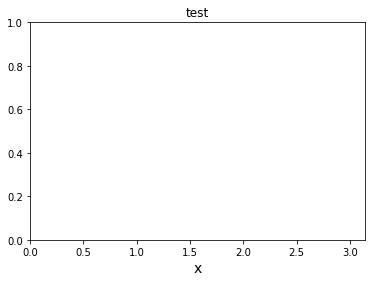

In [32]:
# %load ejemplo_animation_1.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(0, np.pi, 25)
data = np.c_[x, np.sin(x)].T


def update_line(num, data, line):
  line.set_data(data[..., :num])
  # En este caso equivalente a:  line.set_data(data[:, :num])
  return line,

fig1 = plt.figure()
l, = plt.plot([], [], 'r-o', animated='True')

plt.xlim(0, np.pi)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=100, blit=True)

#line_ani.save('lineas.avi', fps=10)
plt.show()


Como vemos, después de importar el submódulo `animation` (además de lo usual), es este código definimos la figura, y la inicializamos con:
```python
fig1 = plt.figure()
l, = plt.plot([], [], 'r-', animated='True')

plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
plt.xlabel('x')
plt.title('test')
```
Como sabemos, el llamado a `plot()` devuelve una lista de líneas (de un solo elemento). A este elemento lo llamamos `l`.

Después, le damos a nuestra figura las características que queremos que tenga (límites, labels, títulos, etc).

Finalmente llamamos a la función que hace la animación: `animation.FuncAnimation()`


In [33]:
import matplotlib.animation as animation
np.info(animation.FuncAnimation)

 FuncAnimation()

Makes an animation by repeatedly calling a function ``func``.


Parameters
----------
fig : matplotlib.figure.Figure
   The figure object that is used to get draw, resize, and any
   other needed events.

func : callable
   The function to call at each frame.  The first argument will
   be the next value in ``frames``.   Any additional positional
   arguments can be supplied via the ``fargs`` parameter.

   The required signature is ::

      def func(fr: object, *fargs) -> iterable_of_artists:

frames : iterable, int, generator function, or None, optional
    Source of data to pass ``func`` and each frame of the animation

    If an iterable, then simply use the values provided.  If the
    iterable has a length, it will override the ``save_count`` kwarg.

    If an integer, equivalent to passing ``range(frames)``

    If a generator function, then must have the signature ::

       def gen_function() -> obj:

    In all of these cases, the values in `frames` is simp

```python
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=100, blit=True)
```

La función `FuncAnimation()` toma como argumentos, la figura (`fig1`), una función a la que llama antes de dibujar cada *frame* (`update_line`), y otros argumentos (opcionales).

Concentrémonos en la función que realiza cada frame:

```python
def update_line(num, data, line):
  line.set_data(data[..., :num])
  # En este caso el uso de la Ellipsis (...) es equivalente a:
  line.set_data(data[:, :num])
  return line,
```

Esta función devuelve una línea, que es la parte del gráfico que queremos que se actualice en cada frame. 

Es importante que el objeto creado por `FuncAnimation()` no se destruya. Esto se logra asignándoselo a una variable.

El argumento `blit=True` le dice a la función que sólo actualice la parte que cambia.